In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xlrd
import re
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('lsiowa_cleaned.csv')
dfbin = pd.read_csv('lsiowa_bin.csv')
dfcopybin = pd.read_csv('lsiowa_cleaned_iclotl_bin.csv')
dfbin

,date,category_name,vendor_name,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,...,sold_in_pack,sold_in_partial,sale_price_per_gallon,retail_gross_profit,store_cost_per_gallons,retail_gpm_ratio,avg_category_per_gallons,avg_category_retail_gp,avg_category_retail_gpm,avg_category_sales_per_gallons
0,2015-03-02,BOURBON WHISKIES,CAMPARI(SKYY),WILD TURKEY,12,750,10.50,15.75,3,47.25,...,0.0,3,80.08,31.50,26.69,0.67,41.643398,88.270668,0.674009,104.879079
1,2016-01-11,BLENDED WHISKIES,DIAGEO AMERICAS,SEAGRAMS 7,24,375,3.50,5.25,24,126.00,...,24.0,0,52.94,120.75,2.21,0.96,19.773007,64.389559,0.750841,55.929033
2,2019-07-31,IRISH WHISKIES,PROXIMO,BUSHMILLS IRISH,12,750,14.00,21.00,4,84.00,...,0.0,4,106.33,63.00,26.58,0.75,77.355298,120.892560,0.630327,160.261458
3,2017-04-25,AND LIQUEURS,MAST JAGERMEISTER US,JAGERMEISTER LIQUEUR,12,1000,15.96,23.94,1,23.31,...,0.0,1,89.65,-0.63,92.08,-0.03,51.081621,86.921868,0.620151,121.738901
4,2019-03-25,AMERICAN SCHNAPPS,JIM BEAM BRANDS,DEKUYPER RASPBERRY,12,750,6.50,9.75,2,19.50,...,0.0,2,50.00,9.75,25.00,0.50,56.981875,45.247431,0.661725,109.640451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47624,2013-06-10,AMERICAN VODKAS,LUXCO,HAWKEYE VODKA,12,500,3.73,5.59,12,67.08,...,12.0,0,42.19,61.49,3.52,0.92,24.230541,71.763662,0.807292,67.178186
47625,2019-07-09,CANADIAN WHISKIES,DIAGEO AMERICAS,CROWN ROYAL,12,1000,18.89,28.34,12,340.08,...,12.0,0,107.28,311.74,8.94,0.92,34.196238,86.564860,0.730685,89.546567
47626,2018-02-28,VODKA MISC,STOLI GROUP,STOLI STRASBERRI,12,750,9.99,14.99,24,359.76,...,24.0,0,75.58,344.77,3.15,0.96,40.384591,83.770364,0.628336,102.726391
47627,2016-03-09,WHITE RUM,BACARDI USA,BACARDI SUPERIOR,48,200,2.50,3.75,6,22.50,...,0.0,6,70.31,18.75,11.72,0.83,22.704598,69.691054,0.741838,57.922101


# Data Size Compare To Real Case

In [3]:
print('1 : ', 48380801/(dfcopybin['volume_sold_gallons'][dfcopybin['date']<'2021-01-01'].sum()))

1 :  397.93338797492856


# Volume Sold by Sub-Category and Vendor - Pie Chart

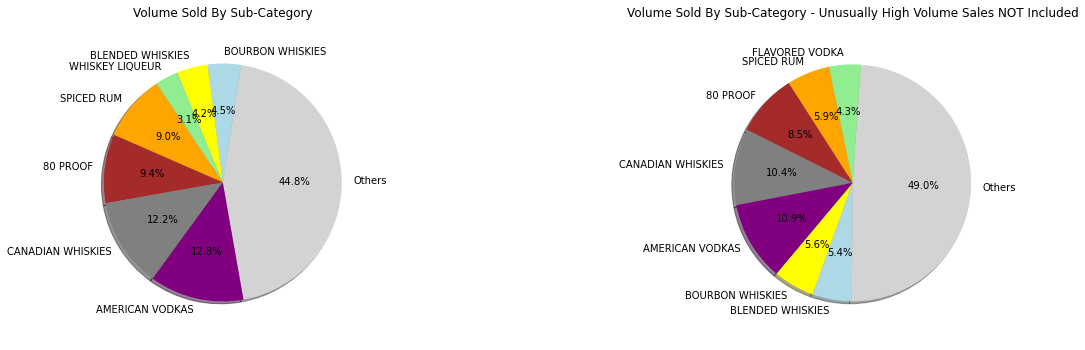

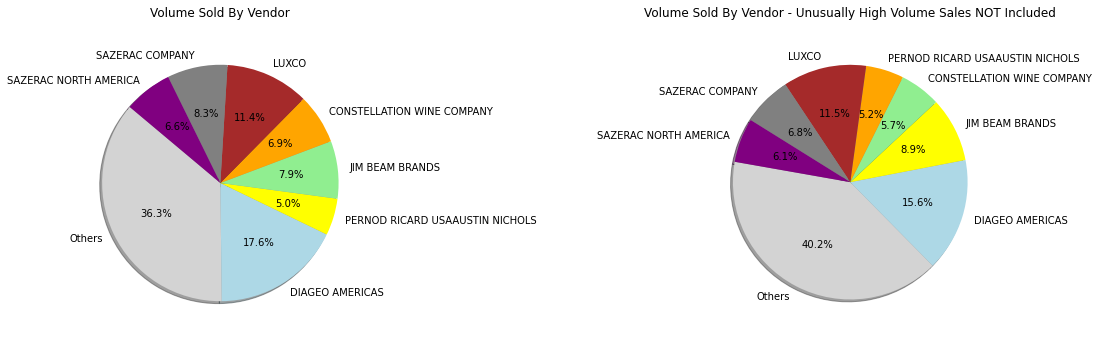

In [4]:
plt.figure(figsize=(16,20))

plt.subplot(3,3,1)
labels = ['Others', 'BOURBON WHISKIES', 'BLENDED WHISKIES', 'WHISKEY LIQUEUR', 'SPICED RUM', '80 PROOF', 'CANADIAN WHISKIES', 'AMERICAN VODKAS']
colors = ['lightgrey', 'lightblue', 'yellow', 'lightgreen', 'orange', 'brown', 'grey', 'purple']
plt.pie(dfcopybin.groupby('category_volume', sort=False)['volume_sold_gallons'].sum(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=280)
plt.axis('equal')
plt.title('Volume Sold By Sub-Category')

plt.subplot(3,3,3)
labels = ['BOURBON WHISKIES', 'BLENDED WHISKIES', 'Others', 'FLAVORED VODKA', 'SPICED RUM', '80 PROOF', 'CANADIAN WHISKIES', 'AMERICAN VODKAS']
colors = ['yellow', 'lightblue', 'lightgrey', 'lightgreen', 'orange', 'brown', 'grey', 'purple']
plt.pie(dfbin.groupby('category_volume', sort=False)['volume_sold_gallons'].sum(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=230)
plt.axis('equal')
plt.title('Volume Sold By Sub-Category - Unusually High Volume Sales NOT Included')

plt.show()


plt.figure(figsize=(16,20))

plt.subplot(3,3,1)
labels = ['Others', 'DIAGEO AMERICAS', 'PERNOD RICARD USAAUSTIN NICHOLS', 'JIM BEAM BRANDS', 'CONSTELLATION WINE COMPANY', 'LUXCO', 'SAZERAC COMPANY', 'SAZERAC NORTH AMERICA']
colors = ['lightgrey', 'lightblue', 'yellow', 'lightgreen', 'orange', 'brown', 'grey', 'purple']
plt.pie(dfcopybin.groupby('vendor_volume', sort=False)['volume_sold_gallons'].sum(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Volume Sold By Vendor')

plt.subplot(3,3,3)
labels = ['Others', 'DIAGEO AMERICAS', 'JIM BEAM BRANDS', 'CONSTELLATION WINE COMPANY', 'PERNOD RICARD USAAUSTIN NICHOLS', 'LUXCO', 'SAZERAC COMPANY', 'SAZERAC NORTH AMERICA']
colors = ['lightgrey', 'lightblue', 'yellow', 'lightgreen', 'orange', 'brown', 'grey', 'purple']
plt.pie(dfbin.groupby('vendor_volume', sort=False)['volume_sold_gallons'].sum(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=170)
plt.axis('equal')
plt.title('Volume Sold By Vendor - Unusually High Volume Sales NOT Included')

plt.show()

# Revenue by Sub-Category and Vendor - Pie Chart

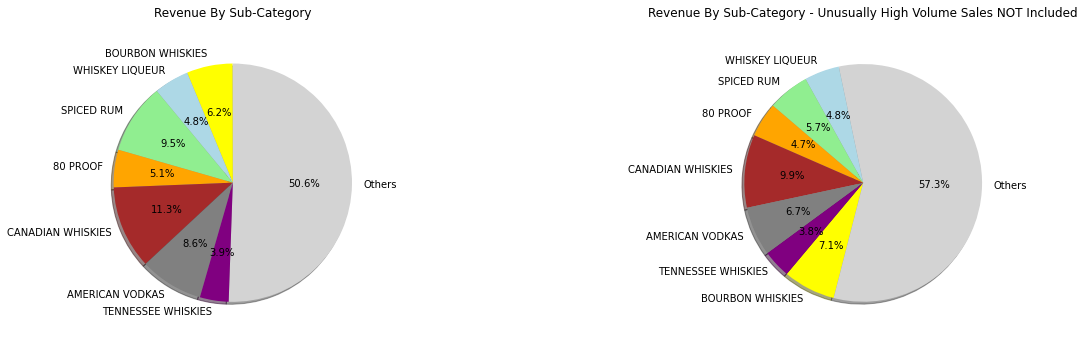

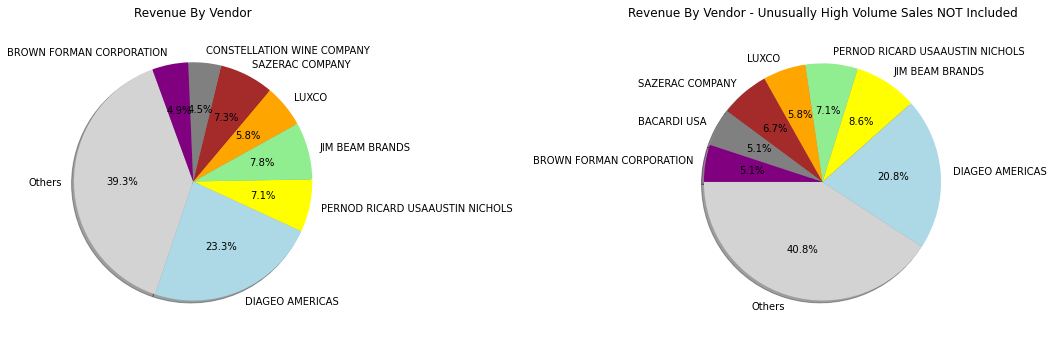

In [5]:
plt.figure(figsize=(16,20))

plt.subplot(3,3,1)
labels = ['Others', 'BOURBON WHISKIES', 'WHISKEY LIQUEUR', 'SPICED RUM', '80 PROOF', 'CANADIAN WHISKIES', 'AMERICAN VODKAS', 'TENNESSEE WHISKIES']
colors = ['lightgrey', 'yellow', 'lightblue', 'lightgreen', 'orange', 'brown', 'grey', 'purple']
plt.pie(dfcopybin.groupby('category_sale', sort=False)['sale_dollars'].sum(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=268)
plt.axis('equal')
plt.title('Revenue By Sub-Category')

plt.subplot(3,3,3)
labels = ['BOURBON WHISKIES', 'Others', 'WHISKEY LIQUEUR', 'SPICED RUM', '80 PROOF', 'CANADIAN WHISKIES', 'AMERICAN VODKAS', 'TENNESSEE WHISKIES']
colors = ['yellow', 'lightgrey', 'lightblue', 'lightgreen', 'orange', 'brown', 'grey', 'purple']
plt.pie(dfbin.groupby('category_sale', sort=False)['sale_dollars'].sum(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=230)
plt.axis('equal')
plt.title('Revenue By Sub-Category - Unusually High Volume Sales NOT Included')

plt.show()


plt.figure(figsize=(16,20))

plt.subplot(3,3,1)
labels = ['Others', 'DIAGEO AMERICAS', 'PERNOD RICARD USAAUSTIN NICHOLS', 'JIM BEAM BRANDS', 'LUXCO', 'SAZERAC COMPANY', 'CONSTELLATION WINE COMPANY', 'BROWN FORMAN CORPORATION']
colors = ['lightgrey', 'lightblue', 'yellow', 'lightgreen', 'orange', 'brown', 'grey', 'purple']
plt.pie(dfcopybin.groupby('vendor_sale', sort=False)['sale_dollars'].sum(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=110)
plt.axis('equal')
plt.title('Revenue By Vendor')

plt.subplot(3,3,3)
labels = ['Others', 'DIAGEO AMERICAS', 'JIM BEAM BRANDS', 'PERNOD RICARD USAAUSTIN NICHOLS', 'LUXCO', 'SAZERAC COMPANY', 'BACARDI USA', 'BROWN FORMAN CORPORATION']
colors = ['lightgrey', 'lightblue', 'yellow', 'lightgreen', 'orange', 'brown', 'grey', 'purple']
plt.pie(dfbin.groupby('vendor_sale', sort=False)['sale_dollars'].sum(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title('Revenue By Vendor - Unusually High Volume Sales NOT Included')

plt.show()

# Item Volume and Revenue - Pie Chart

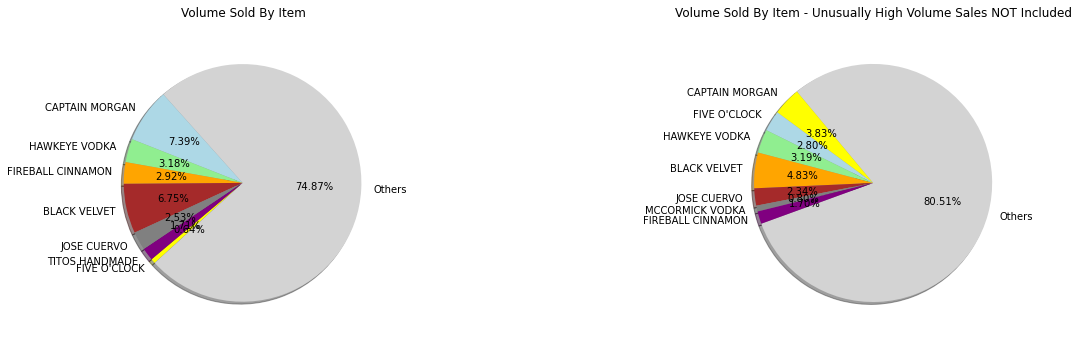

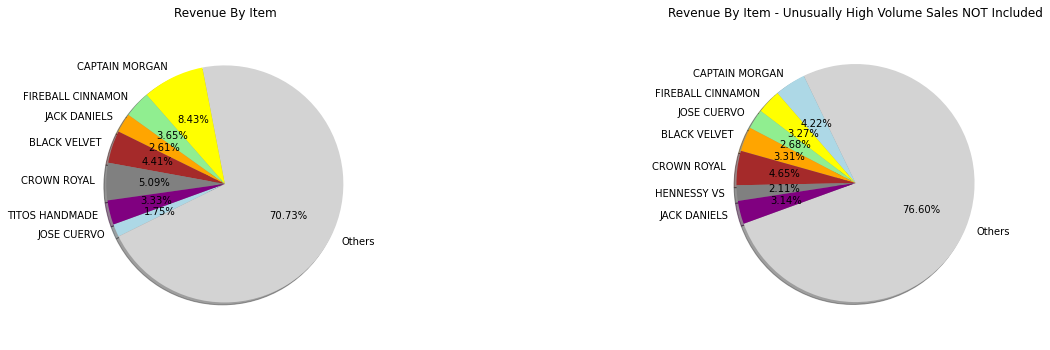

In [6]:
plt.figure(figsize=(16,20))

plt.subplot(3,3,1)
labels = ["FIVE O'CLOCK", 'Others', 'CAPTAIN MORGAN', 'HAWKEYE VODKA', 'FIREBALL CINNAMON', 'BLACK VELVET', 'JOSE CUERVO', 'TITOS HANDMADE']
colors = ['yellow', 'lightgrey', 'lightblue', 'lightgreen', 'orange', 'brown', 'grey', 'purple']
plt.pie(dfcopybin.groupby('item_sale', sort=False)['volume_sold_gallons'].sum(), labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=220)
plt.axis('equal')
plt.title('Volume Sold By Item')

plt.subplot(3,3,3)
labels = ['Others', 'CAPTAIN MORGAN', "FIVE O'CLOCK", 'HAWKEYE VODKA', 'BLACK VELVET', 'JOSE CUERVO', 'MCCORMICK VODKA', 'FIREBALL CINNAMON']
colors = ['lightgrey', 'yellow', 'lightblue', 'lightgreen', 'orange', 'brown', 'grey', 'purple']
plt.pie(dfbin.groupby('item_sale', sort=False)['volume_sold_gallons'].sum(), labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=200)
plt.axis('equal')
plt.title('Volume Sold By Item - Unusually High Volume Sales NOT Included')

plt.show()


plt.figure(figsize=(16,20))

plt.subplot(3,3,1)
labels = ['JOSE CUERVO', 'Others', 'CAPTAIN MORGAN', 'FIREBALL CINNAMON', 'JACK DANIELS', 'BLACK VELVET', 'CROWN ROYAL', 'TITOS HANDMADE']
colors = ['lightblue', 'lightgrey', 'yellow', 'lightgreen', 'orange', 'brown', 'grey', 'purple']
plt.pie(dfcopybin.groupby('item_sale', sort=False)['sale_dollars'].sum(), labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=200)
plt.axis('equal')
plt.title('Revenue By Item')

plt.subplot(3,3,3)
labels = ['Others', 'CAPTAIN MORGAN', 'FIREBALL CINNAMON', 'JOSE CUERVO', 'BLACK VELVET', 'CROWN ROYAL', 'HENNESSY VS', 'JACK DANIELS']
colors = ['lightgrey', 'lightblue', 'yellow', 'lightgreen', 'orange', 'brown', 'grey', 'purple']
plt.pie(dfbin.groupby('item_sale', sort=False)['sale_dollars'].sum(), labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=200)
plt.axis('equal')
plt.title('Revenue By Item - Unusually High Volume Sales NOT Included')

plt.show()

# Top 5 Gross Profits

**Highest Total Gross Profit by Sub-Category**

In [7]:
total_store_gp_cat = dfbin[['category_name', 'retail_gross_profit']].groupby(['category_name']).sum().sort_values('retail_gross_profit', ascending=False).head(5)
total_store_gp_cat_otl = dfcopybin[['category_name', 'retail_gross_profit']].groupby(['category_name']).sum().sort_values('retail_gross_profit', ascending=False).head(5)

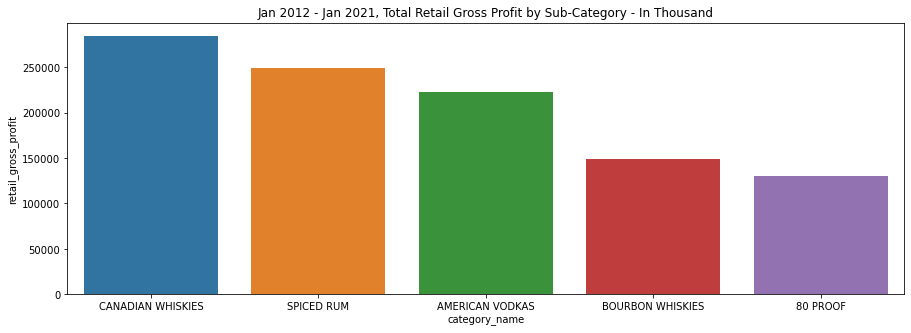

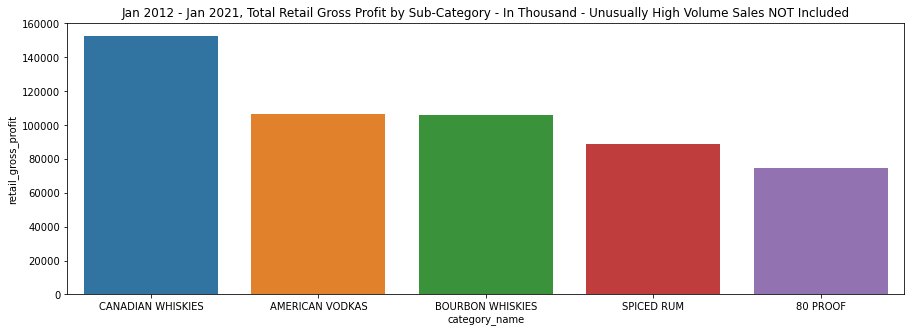

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,1,1)
# *0.3979 -> 1/1000 real case/data
sns.barplot(data = total_store_gp_cat_otl, x=total_store_gp_cat_otl.index, y =total_store_gp_cat_otl['retail_gross_profit']*0.3979)
plt.title('Jan 2012 - Jan 2021, Total Retail Gross Profit by Sub-Category - In Thousand')
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,1,1)
# *0.3979 -> 1/1000 real case/data
sns.barplot(data = total_store_gp_cat, x=total_store_gp_cat.index, y =total_store_gp_cat['retail_gross_profit']*0.3979)
plt.title('Jan 2012 - Jan 2021, Total Retail Gross Profit by Sub-Category - In Thousand - Unusually High Volume Sales NOT Included')
plt.show()


**Highest Average Gross Profit Per Invoice by Sub-Category**

In [9]:
avg_store_gp_cat = dfbin[['category_name', 'avg_category_retail_gp']].groupby(['category_name']).mean().sort_values('avg_category_retail_gp', ascending=False).head(5)
avg_store_gp_cat_otl = dfcopybin[['category_name', 'avg_category_retail_gp']].groupby(['category_name']).mean().sort_values('avg_category_retail_gp', ascending=False).head(5)

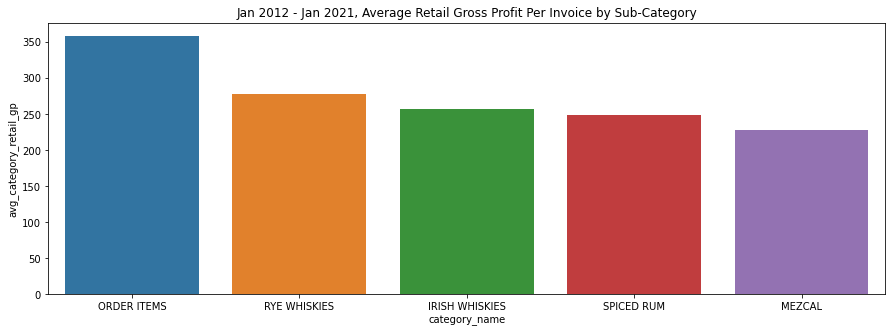

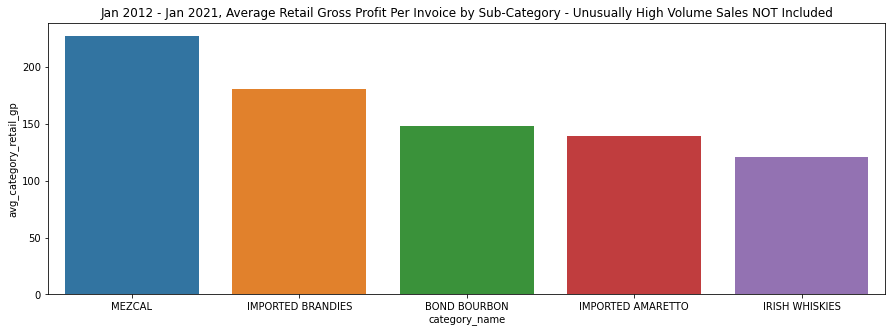

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,1,1)
sns.barplot(data = avg_store_gp_cat_otl, x=avg_store_gp_cat_otl.index, y =avg_store_gp_cat_otl['avg_category_retail_gp'])
plt.title('Jan 2012 - Jan 2021, Average Retail Gross Profit Per Invoice by Sub-Category')
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,1,1)
sns.barplot(data = avg_store_gp_cat, x=avg_store_gp_cat.index, y =avg_store_gp_cat['avg_category_retail_gp'])
plt.title('Jan 2012 - Jan 2021, Average Retail Gross Profit Per Invoice by Sub-Category - Unusually High Volume Sales NOT Included')
plt.show()

**Popular Sub-Category Average Gross Profit Margin**

In [11]:
popular_cat_agpm = dfbin[['category_sale', 'avg_category_retail_gpm']].groupby(['category_sale']).mean().sort_values('avg_category_retail_gpm', ascending=False)
popular_cat_agpm_otl = dfcopybin[['category_sale', 'avg_category_retail_gpm']].groupby(['category_sale']).mean().sort_values('avg_category_retail_gpm', ascending=False)

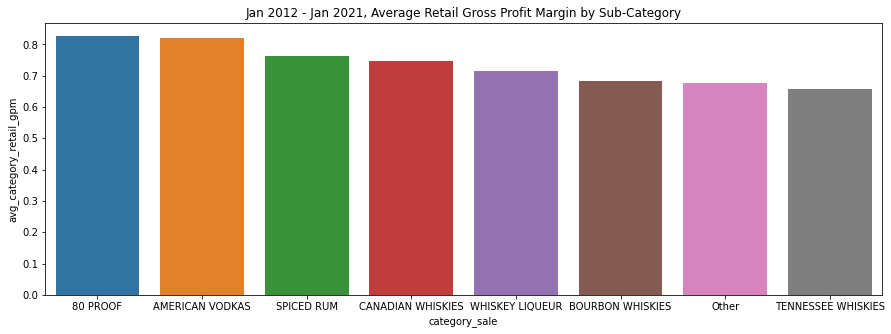

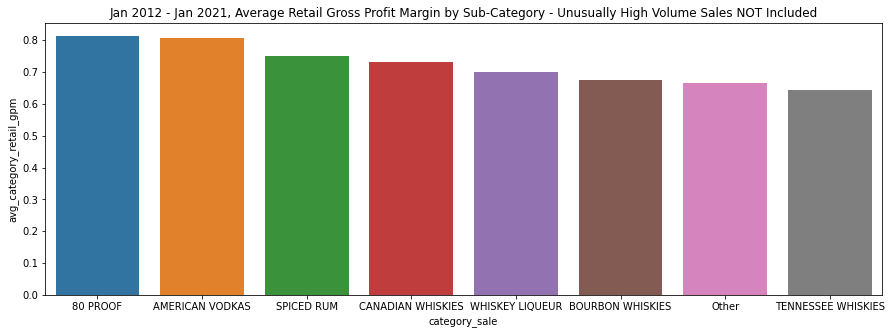

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,1,1)
sns.barplot(data = popular_cat_agpm_otl, x=popular_cat_agpm_otl.index, y =popular_cat_agpm_otl['avg_category_retail_gpm'])
plt.title('Jan 2012 - Jan 2021, Average Retail Gross Profit Margin by Sub-Category')
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,1,1)
sns.barplot(data = popular_cat_agpm, x=popular_cat_agpm.index, y =popular_cat_agpm['avg_category_retail_gpm'])
plt.title('Jan 2012 - Jan 2021, Average Retail Gross Profit Margin by Sub-Category - Unusually High Volume Sales NOT Included')
plt.show()

# Item With Good Possibility To Raise It's Price

### Including High Volume Sales (outliers)

In [13]:
df_before_2020 = dfcopybin[dfcopybin['date'] < '2020-01-01']
df_after_2020 = dfcopybin[dfcopybin['date'] >= '2020-01-01']

## Item's Average Volume, Sale, Price, Gross Profit, Gross Profit Margin, Cost Of Goods Sold, etc

**2012-2019**

In [14]:
mean_by_item = df_before_2020.groupby(['item_description']).mean()
mean_by_item.head(3)

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_gallons,sold_in_pack,sold_in_partial,sale_price_per_gallon,retail_gross_profit,store_cost_per_gallons,retail_gpm_ratio,avg_category_per_gallons,avg_category_retail_gp,avg_category_retail_gpm,avg_category_sales_per_gallons
item_description,,,,,,,,,,,,,,,,,
"""JOSE CUERVO",12.0,750.0,10.50,15.75,12.0,189.000,2.380,12.0,0.0,79.410,173.250,6.620,0.920,84.068014,142.622789,0.627555,161.364827
(RI)1 RYE,3.0,750.0,20.99,31.49,2.5,78.725,0.495,1.5,1.0,158.785,47.235,66.045,0.585,30.978012,176.536386,0.760964,129.037169
10 CANE,6.0,750.0,14.98,22.47,6.0,134.820,1.190,6.0,0.0,113.290,112.350,18.880,0.830,25.776111,65.527222,0.666111,75.437222


**2020+**

In [15]:
mean_by_item_recent = df_after_2020.groupby(['item_description']).mean()
mean_by_item_recent.head(3)

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_gallons,sold_in_pack,sold_in_partial,sale_price_per_gallon,retail_gross_profit,store_cost_per_gallons,retail_gpm_ratio,avg_category_per_gallons,avg_category_retail_gp,avg_category_retail_gpm,avg_category_sales_per_gallons
item_description,,,,,,,,,,,,,,,,,
1792 BOTTLE,6.0,750.0,20.00,30.00,1.0,30.00,0.19,0.0,1.0,157.89,0.00,157.89,0.0,104.210484,193.179032,0.691801,191.752070
1800 ANEJO,6.0,750.0,22.41,33.62,2.0,67.24,0.39,0.0,2.0,172.41,33.62,86.21,0.5,125.569643,143.763320,0.584841,218.876415
1800 CRISTALINO,6.0,750.0,29.76,44.64,2.0,89.28,0.39,0.0,2.0,228.92,44.64,114.46,0.5,125.569643,143.763320,0.584841,218.876415


## Item's Total Volume, Sale, Price, Gross Profit, Cost of Goods Sold, etc

**2012-2019**

In [16]:
sum_by_item = df_before_2020.groupby(['item_description']).sum()
sum_by_item.head(3)

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_gallons,sold_in_pack,sold_in_partial,sale_price_per_gallon,retail_gross_profit,store_cost_per_gallons,retail_gpm_ratio,avg_category_per_gallons,avg_category_retail_gp,avg_category_retail_gpm,avg_category_sales_per_gallons
item_description,,,,,,,,,,,,,,,,,
"""JOSE CUERVO",24,1500,21.00,31.50,24,378.00,4.76,24.0,0,158.82,346.50,13.24,1.84,168.136028,285.245578,1.255109,322.729653
(RI)1 RYE,6,1500,41.98,62.98,5,157.45,0.99,3.0,2,317.57,94.47,132.09,1.17,61.956024,353.072771,1.521928,258.074337
10 CANE,6,750,14.98,22.47,6,134.82,1.19,6.0,0,113.29,112.35,18.88,0.83,25.776111,65.527222,0.666111,75.437222


**2020+**

In [17]:
sum_by_item_recent = df_after_2020.groupby(['item_description']).sum()
sum_by_item_recent.head(3)

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_gallons,sold_in_pack,sold_in_partial,sale_price_per_gallon,retail_gross_profit,store_cost_per_gallons,retail_gpm_ratio,avg_category_per_gallons,avg_category_retail_gp,avg_category_retail_gpm,avg_category_sales_per_gallons
item_description,,,,,,,,,,,,,,,,,
1792 BOTTLE,6,750,20.00,30.00,1,30.00,0.19,0.0,1,157.89,0.00,157.89,0.0,104.210484,193.179032,0.691801,191.752070
1800 ANEJO,6,750,22.41,33.62,2,67.24,0.39,0.0,2,172.41,33.62,86.21,0.5,125.569643,143.763320,0.584841,218.876415
1800 CRISTALINO,6,750,29.76,44.64,2,89.28,0.39,0.0,2,228.92,44.64,114.46,0.5,125.569643,143.763320,0.584841,218.876415


## High Gross Profit Item (For Stores)

**Item With : High Average Gross Profit, High Average Gross Profit Margin, Low Average Cost Of Goods Sold - Compared To Item's Within It's Sub-Category**

**2012-2019**

In [38]:
store_high_profit_item = mean_by_item[(mean_by_item['retail_gross_profit']>mean_by_item['avg_category_retail_gp']) & (mean_by_item['retail_gpm_ratio']>mean_by_item['avg_category_retail_gpm']) & (mean_by_item['store_cost_per_gallons']<mean_by_item['avg_category_per_gallons'])]
print('Total Item', len(store_high_profit_item.index))
store_high_profit_item.head(3)

Total Item 203


,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_gallons,sold_in_pack,sold_in_partial,sale_price_per_gallon,retail_gross_profit,store_cost_per_gallons,retail_gpm_ratio,avg_category_per_gallons,avg_category_retail_gp,avg_category_retail_gpm,avg_category_sales_per_gallons
item_description,,,,,,,,,,,,,,,,,
"""JOSE CUERVO",12.0,750.0,10.50,15.750,12.0,189.000,2.380,12.0,0.0,79.410,173.25,6.620,0.920,84.068014,142.622789,0.627555,161.364827
10 CANE,6.0,750.0,14.98,22.470,6.0,134.820,1.190,6.0,0.0,113.290,112.35,18.880,0.830,25.776111,65.527222,0.666111,75.437222
360 BUTTERED,12.0,750.0,7.83,12.495,7.5,100.485,1.485,6.0,1.5,63.235,87.99,12.255,0.795,23.950463,66.295154,0.668587,63.221253


**2020+**

In [39]:
store_high_profit_item_recent = mean_by_item_recent[(mean_by_item_recent['retail_gross_profit']>mean_by_item_recent['avg_category_retail_gp']) & (mean_by_item_recent['retail_gpm_ratio']>mean_by_item_recent['avg_category_retail_gpm']) & (mean_by_item_recent['store_cost_per_gallons']<mean_by_item_recent['avg_category_per_gallons'])]
print('Total Item', len(store_high_profit_item_recent.index))
store_high_profit_item_recent.head(3)

Total Item 162


,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_gallons,sold_in_pack,sold_in_partial,sale_price_per_gallon,retail_gross_profit,store_cost_per_gallons,retail_gpm_ratio,avg_category_per_gallons,avg_category_retail_gp,avg_category_retail_gpm,avg_category_sales_per_gallons
item_description,,,,,,,,,,,,,,,,,
1800 PEACH,6.0,1750.0,10.04,15.06,36.0,542.16,16.64,36.0,0.0,32.60,527.10,2.965,0.905,9.076730,72.419699,0.726877,31.643641
99 COCONUT,10.0,500.0,6.00,9.00,10.0,90.00,1.32,10.0,0.0,68.18,81.00,6.820,0.900,53.970438,66.824447,0.678445,105.475444
99 MANGOES,48.0,100.0,0.95,1.43,48.0,68.64,1.26,48.0,0.0,54.48,67.21,1.130,0.980,63.187211,46.469592,0.629127,106.567494


**High Gross Profit Item 2012-2019 and Still High Profit Item 2020+**

In [40]:
#the data has to be separated and rejoined, because there might be some items in 2012-2020+ full list, 
#that currently is no longer highly profitable for stores

#rather than using only 2020+ data, analyzing both "2012-2019" & "2020+" gives a longer time horizon

still_high_profit = []
for h in range (len(store_high_profit_item.index)):
    for i in range (len(store_high_profit_item_recent.index)):
        if store_high_profit_item.index[h] == store_high_profit_item_recent.index[i]:
            still_high_profit.append(store_high_profit_item.index[h])    

print('Total Item', len(still_high_profit))

Total Item 28


## Underpriced Items

**Item With Average Sale Price Per Gallons Lower Than Average Sale Price Per Gallons of Items Within It's Sub-Category**

**2012-2019**

In [41]:
underpriced_item = mean_by_item[(mean_by_item['sale_price_per_gallon']<mean_by_item['avg_category_sales_per_gallons'])]
print('Total Item', len(underpriced_item.index))
underpriced_item.head(3)

Total Item 806


,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_gallons,sold_in_pack,sold_in_partial,sale_price_per_gallon,retail_gross_profit,store_cost_per_gallons,retail_gpm_ratio,avg_category_per_gallons,avg_category_retail_gp,avg_category_retail_gpm,avg_category_sales_per_gallons
item_description,,,,,,,,,,,,,,,,,
"""JOSE CUERVO",12.000000,750.000000,10.500000,15.750000,12.000000,189.000000,2.380000,12.000000,0.000000,79.410000,173.250000,6.620000,0.920000,84.068014,142.622789,0.627555,161.364827
1800 COCONUT,11.142857,714.285714,13.108571,19.948571,2.142857,44.897143,0.414286,0.000000,2.142857,102.661429,24.948571,68.902857,0.310000,78.139210,142.459856,0.633656,153.148885
1800 REPOSADO,11.351351,770.270270,15.044595,22.644595,6.567568,149.189189,1.354595,5.027027,1.540541,111.620000,126.544595,37.737027,0.667297,77.882411,143.804223,0.636217,152.859900


**2020+**

In [42]:
underpriced_item_recent = mean_by_item_recent[(mean_by_item_recent['sale_price_per_gallon']<mean_by_item_recent['avg_category_sales_per_gallons'])]
print('Total Item', len(underpriced_item_recent.index))
underpriced_item_recent.head(3)

Total Item 448


,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_gallons,sold_in_pack,sold_in_partial,sale_price_per_gallon,retail_gross_profit,store_cost_per_gallons,retail_gpm_ratio,avg_category_per_gallons,avg_category_retail_gp,avg_category_retail_gpm,avg_category_sales_per_gallons
item_description,,,,,,,,,,,,,,,,,
1792 BOTTLE,6.0,750.0,20.000,30.000,1.0,30.000,0.190,0.0,1.0,157.890,0.000,157.890,0.000,104.210484,193.179032,0.691801,191.752070
1800 ANEJO,6.0,750.0,22.410,33.620,2.0,67.240,0.390,0.0,2.0,172.410,33.620,86.210,0.500,125.569643,143.763320,0.584841,218.876415
1800 REPOSADO,9.6,850.0,16.276,24.414,4.6,110.958,0.998,3.6,1.0,111.606,86.544,57.742,0.484,125.569643,143.763320,0.584841,218.876415


**Underpriced Item 2012-2019 and Still Underpriced 2020+**

In [43]:
#the data has to be separated and rejoined, because there might be some items in 2012-2020+ full list, 
#that currently is no longer underpriced

#rather than using only 2020+ data, analyzing both "2012-2019" & "2020+" gives a longer time horizon

still_underpriced = []
for h in range (len(underpriced_item.index)):
    for i in range (len(underpriced_item_recent.index)):
        if underpriced_item.index[h] == underpriced_item_recent.index[i]:
            still_underpriced.append(underpriced_item.index[h])  
            
print('Total Item', len(still_underpriced))

Total Item 351


## Good Volume Sales Items

**Item With Total Volume Sales Higher Than Average**

**2012-2019**

In [44]:
above_mean_volume_item = sum_by_item[(sum_by_item['volume_sold_gallons']>sum_by_item['volume_sold_gallons'].mean())]
print('Total Item', len(above_mean_volume_item.index))
above_mean_volume_item.head(3)

Total Item 139


,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_gallons,sold_in_pack,sold_in_partial,sale_price_per_gallon,retail_gross_profit,store_cost_per_gallons,retail_gpm_ratio,avg_category_per_gallons,avg_category_retail_gp,avg_category_retail_gpm,avg_category_sales_per_gallons
item_description,,,,,,,,,,,,,,,,,
ABSOLUT CITRON,1170,89625,1292.61,1942.06,1079,21103.96,255.42,942.0,137,8349.07,19161.9,2656.93,68.53,4021.159576,10451.462146,63.631668,10325.893235
ABSOLUT SWEDISH,7204,493575,6847.88,10279.85,5937,117170.35,1469.34,5092.0,845,54998.18,106890.5,18413.87,400.03,24105.128450,90159.363521,403.595952,62389.013439
ADMIRAL NELSON,6180,579875,4104.01,6156.74,4975,52575.24,1300.33,4308.0,667,23871.16,46418.5,6065.19,420.86,10881.383114,131207.332913,417.431952,38615.486210


**2020+**

In [45]:
above_mean_volume_item_recent = sum_by_item_recent[(sum_by_item_recent['volume_sold_gallons']>sum_by_item_recent['volume_sold_gallons'].mean())]
print('Total Item', len(above_mean_volume_item_recent.index))
above_mean_volume_item_recent.head(3)

Total Item 107


,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_gallons,sold_in_pack,sold_in_partial,sale_price_per_gallon,retail_gross_profit,store_cost_per_gallons,retail_gpm_ratio,avg_category_per_gallons,avg_category_retail_gp,avg_category_retail_gpm,avg_category_sales_per_gallons
item_description,,,,,,,,,,,,,,,,,
1800 PEACH,12,3500,20.08,30.12,72,1084.32,33.28,72.0,0,65.20,1054.20,5.93,1.81,18.153459,144.839398,1.453754,63.287283
1800 SILVER,156,10225,247.26,370.89,122,2716.44,22.84,90.0,32,8291.95,2345.55,7072.95,10.31,1987.755127,2349.628834,9.464420,3474.898300
1800 ULTIMATE,90,26250,150.60,225.90,70,1054.20,32.29,54.0,16,490.14,828.30,155.38,10.24,136.150945,1086.295483,10.903151,474.654622


**Good Volume Sales 2012-2019 and Still Good Volume Sales 2020+**

In [46]:
#the data has to be separated and rejoined, because there might be some items in 2012-2020+ full list, 
#that currently is no longer selling

#rather than using only 2020+ data, analyzing both "2012-2019" & "2020+" gives a longer time horizon

still_good_volume = []
for h in range (len(above_mean_volume_item.index)):
    for i in range (len(above_mean_volume_item_recent.index)):
        if above_mean_volume_item.index[h] == above_mean_volume_item_recent.index[i]:
            still_good_volume.append(above_mean_volume_item.index[h])
            
print('Total Item', len(still_good_volume))

Total Item 89


## Possibility of Untapped Pricing Power

**Item With : Good Volume Sales, High Gross Profit For Stores, and Underpriced Within It's Sub-Category**

**2012-2019**

In [27]:
untapped = []
#if item in store_high_profit_item list, and in underpriced_item list, and in above_mean_volume_item list,
#item has untapped pricing power as of 2012-2019
for h in range (len(store_high_profit_item)):
    for i in range (len(underpriced_item)):
        for j in range(len(above_mean_volume_item)):
            if store_high_profit_item.index[h] == underpriced_item.index[i] == above_mean_volume_item.index[j]:
                untapped.append(store_high_profit_item.index[h])


**2020+**

In [28]:
untapped_recent = []
#if item in store_high_profit_item list, and in underpriced_item list, and in above_mean_volume_item list,
#item has untapped pricing power as of 2020+
for h in range (len(store_high_profit_item_recent)):
    for i in range (len(underpriced_item_recent)):
        for j in range(len(above_mean_volume_item_recent)):
            if store_high_profit_item_recent.index[h] == underpriced_item_recent.index[i] == above_mean_volume_item_recent.index[j]:
                untapped_recent.append(store_high_profit_item_recent.index[h])


In [29]:
#if item in untapped and untapped_recent list, item has pricing power as 2020+

#the data has to be separated and rejoined, because there might be some items in 2012-2020+ full list, 
#that has raise it's price in 2020, or currently is no longer highly profitable for stores, or no longer underpriced, or no longer selling in above average volume

#rather than using only 2020+ data, analyzing both "2012-2019" & "2020+" gives a longer time horizon,
#since vendor has to be sure, the item has been doing well in the market for a long period of time, before tapping it's pricing power

untapped_pricing_power = []
for h in range (len(untapped)):
    for i in range (len(untapped_recent)):
        if untapped[h] == untapped_recent[i]:
            untapped_pricing_power.append(untapped[h])
            
untapped_pricing_power

['DEKUYPER LUSCIOUS',
 'JUAREZ TEQUILA',
 'KIRKLAND SIGNATURE',
 'MEMBERS MARK',
 'MONTEZUMA GOLD']

# Percentage of Partial and Whole Pack Sales

**Excluding High Volume Sales (Outliers)**

**Percentage of Partial Sales by Pack Size**

In [56]:
pack_size_group = dfbin[['sold_in_pack', 'sold_in_partial', 'pack']].groupby(['pack']).sum().sort_values('sold_in_pack', ascending=False).head(5)
((pack_size_group['sold_in_partial']/pack_size_group['sold_in_pack'])*100).sort_values(ascending=True)

pack
6     10.258198
48    15.619584
12    25.396975
24    30.049073
10    66.225490
dtype: float64

**Percentage of Partial Sales by Bottle Volume**

In [54]:
pack_size_group = dfbin[['sold_in_pack', 'sold_in_partial', 'bottle_volume_ml']].groupby(['bottle_volume_ml']).sum().sort_values('sold_in_pack', ascending=False).head(5)
((pack_size_group['sold_in_partial']/pack_size_group['sold_in_pack'])*100).sort_values(ascending=True)

bottle_volume_ml
1750     6.389770
1000    16.691561
200     22.704042
750     25.771173
375     34.582426
dtype: float64